<a href="https://colab.research.google.com/github/JYPIT/DataScience/blob/main/Machine%20Learning/Project/%5BKeras%5D%EC%B9%B4%EB%93%9C%EC%82%AC_%EC%9D%B4%ED%83%99_%EA%B3%A0%EA%B0%9D_%EC%98%88%EC%B8%A1(%EC%9D%B4%ED%83%88_%EA%B3%A0%EA%B0%9D_1%2C_%EA%B8%B0%EC%A1%B4_%EA%B3%A0%EA%B0%9D_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Libraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data visualizaion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data visualizaion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for Analysing the ML model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# 객체를 생성하는 것은 대문자로 되어있다

# 랜덤 시드 고정
np.random.seed(5)

###한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
dataset = pd.read_csv("/content/forkeras_final (1).csv")
dataset

,Unnamed: 0,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,0,0,45,1,3,3,1,2,0,1
1,1,0,49,0,5,2,2,4,0,1
2,2,0,51,1,3,2,1,3,0,1
3,4,0,40,1,3,5,1,2,0,1
4,5,0,44,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3359,4656,1,47,1,4,2,0,3,0,3
3360,4657,1,33,1,2,0,1,0,1,1
3361,4658,1,27,1,0,3,0,2,0,3
3362,4662,1,44,0,1,3,1,4,0,3


In [ ]:
dataset = dataset.dropna(how='any',axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 3363
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              3364 non-null   int64
 1   Attrition_Flag          3364 non-null   int64
 2   Customer_Age            3364 non-null   int64
 3   Gender                  3364 non-null   int64
 4   Dependent_count         3364 non-null   int64
 5   Education_Level         3364 non-null   int64
 6   Marital_Status          3364 non-null   int64
 7   Income_Category         3364 non-null   int64
 8   Card_Category           3364 non-null   int64
 9   Months_Inactive_12_mon  3364 non-null   int64
dtypes: int64(10)
memory usage: 289.1 KB


In [ ]:
'''dataset.drop(['Customer_Age'],axis=1,inplace=True)'''
dataset.shape

(3364, 10)

###현재 고객과 이탈 고객 분포도 확인

In [ ]:
print(dataset['Attrition_Flag'].value_counts())
frequency = [1836,1113]
frequency

0    2251
1    1113
Name: Attrition_Flag, dtype: int64


[1836, 1113]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54788 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51116 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44256 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44061 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44284 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph

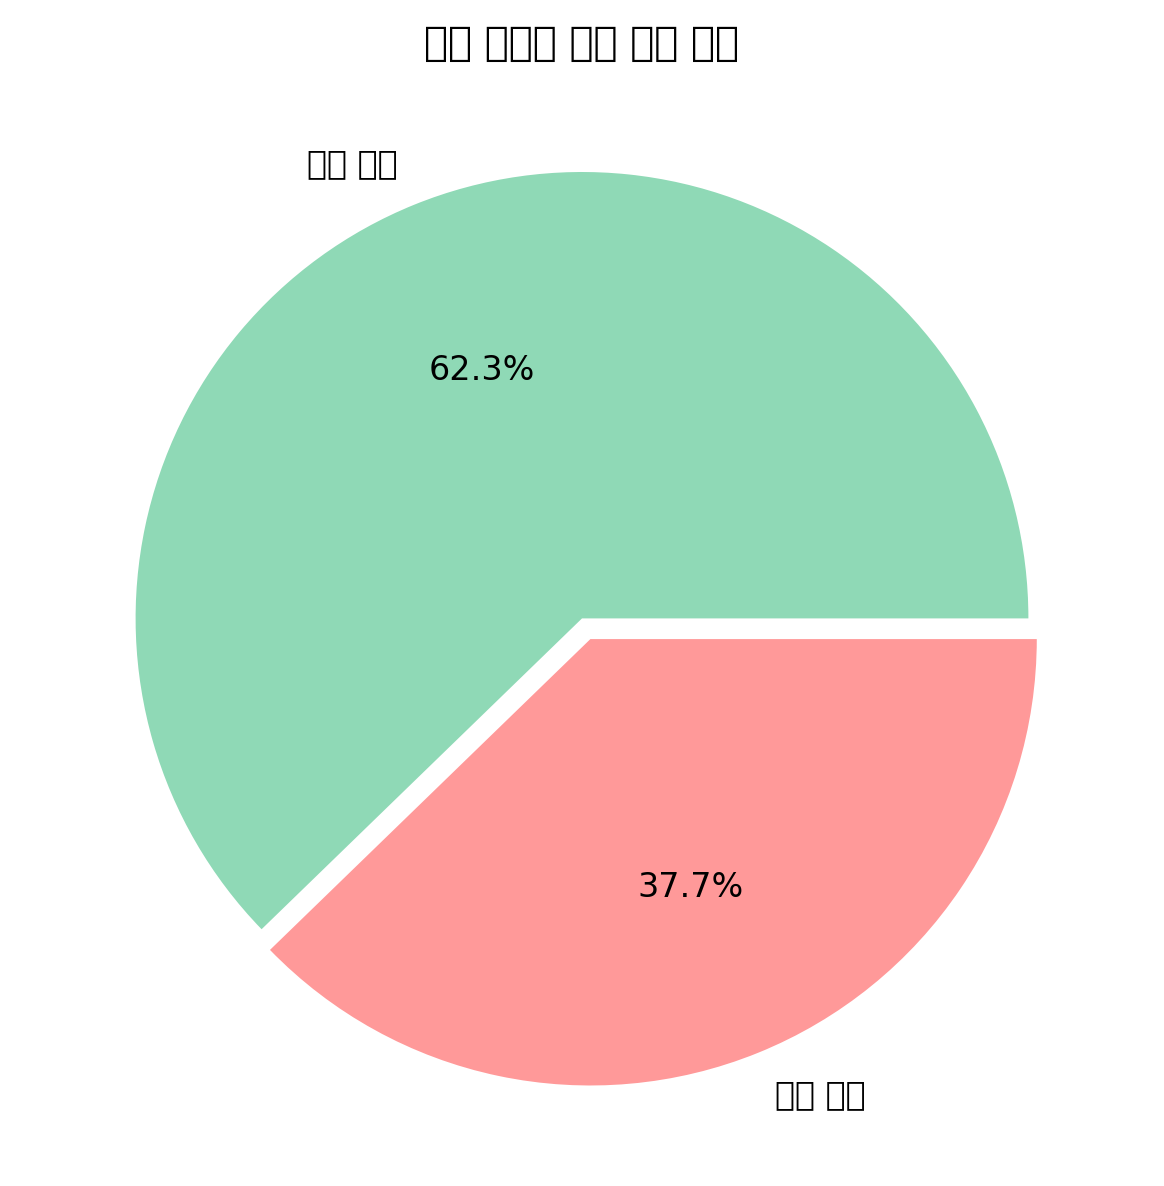

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic')
plt.figure(figsize=(6,6),dpi=120)
label = ['현재 고객','이탈 고객']
color = ['#8fd9b6', '#ff9999']
plt.axis('equal')
plt.pie(x=frequency,labels=label, autopct ='%.1f%%',colors=color,explode=(0,0.05))
plt.title("현재 고객과 이탈 고객 비율")
plt.show()

###MinMaxScaler
* 데이터셋의 모든 값을 0과 1 사이의 값으로 변환한다.

In [ ]:
'''mm_scaler = MinMaxScaler()
dataset_scaled = mm_scaler.fit_transform(dataset)
dataset_scaled_df = pd.DataFrame(dataset, columns=dataset.columns)
dataset_scaled_df.head() '''

'mm_scaler = MinMaxScaler()\ndataset_scaled = mm_scaler.fit_transform(dataset)\ndataset_scaled_df = pd.DataFrame(dataset, columns=dataset.columns)\ndataset_scaled_df.head() '

In [ ]:
dataset_labels = dataset['Attrition_Flag'].copy()
dataset.drop(['Attrition_Flag'],axis=1,inplace=True)

In [ ]:
dataset

,Unnamed: 0,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,0,45,1,3,3,1,2,0,1
1,1,49,0,5,2,2,4,0,1
2,2,51,1,3,2,1,3,0,1
3,4,40,1,3,5,1,2,0,1
4,5,44,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...
3359,4656,47,1,4,2,0,3,0,3
3360,4657,33,1,2,0,1,0,1,1
3361,4658,27,1,0,3,0,2,0,3
3362,4662,44,0,1,3,1,4,0,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    dataset_labels,
                                                    train_size=0.77,
                                                    random_state=77)

In [ ]:
model = Sequential()
model.add(Dense(64,input_dim=9,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size= 64)

Epoch 1/500
41/41 [==============================] - 14s 2ms/step - loss: 72.1467 - accuracy: 0.5310
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 3.5567 - accuracy: 0.5856
Epoch 3/500
41/41 [==============================] - 0s 2ms/step - loss: 0.9775 - accuracy: 0.6928
Epoch 4/500
41/41 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.7370
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.7576 - accuracy: 0.7345
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3467 - accuracy: 0.6976
Epoch 7/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.7074
Epoch 8/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7853
Epoch 9/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7920
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 0.7741 - accuracy: 0.7304
Epoch 1

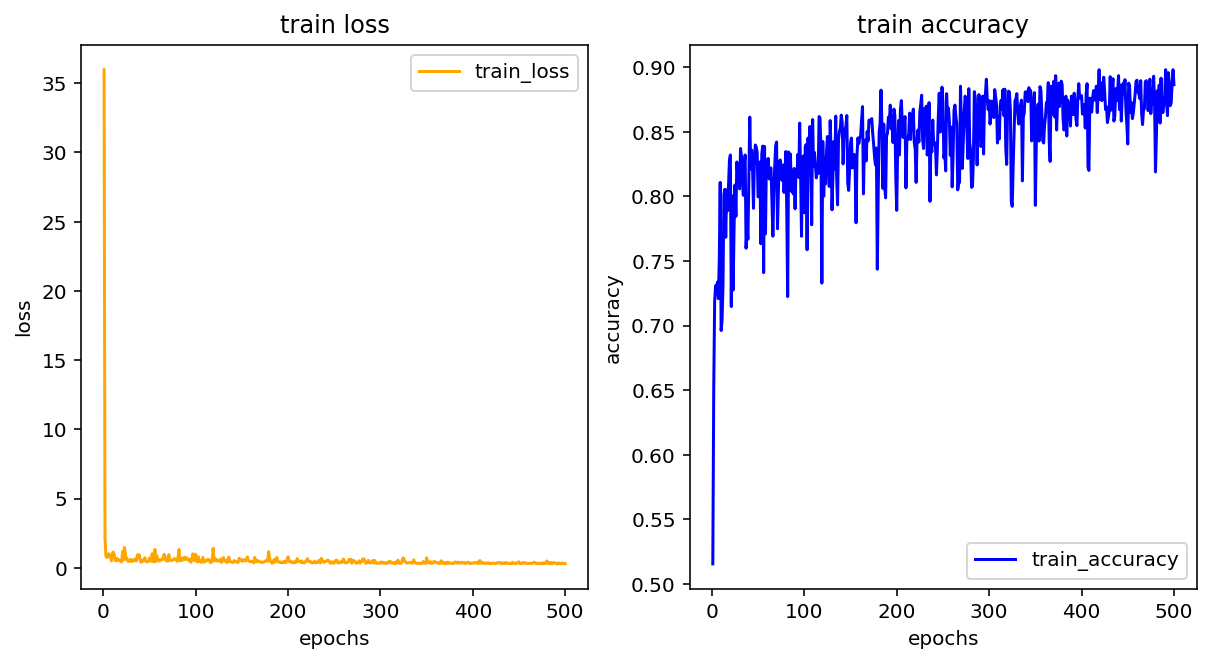

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

25/25 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8669
accuracy: 86.69%


In [ ]:
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# 모델 예측하기
result = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
from sklearn import metrics 
report = metrics.classification_report(y_test,result)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       544
           1       0.74      0.85      0.79       230

    accuracy                           0.87       774
   macro avg       0.84      0.86      0.85       774
weighted avg       0.88      0.87      0.87       774



In [ ]:
print(metrics.precision_score(y_test,result))
print(metrics.recall_score(y_test,result))

0.7396226415094339
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



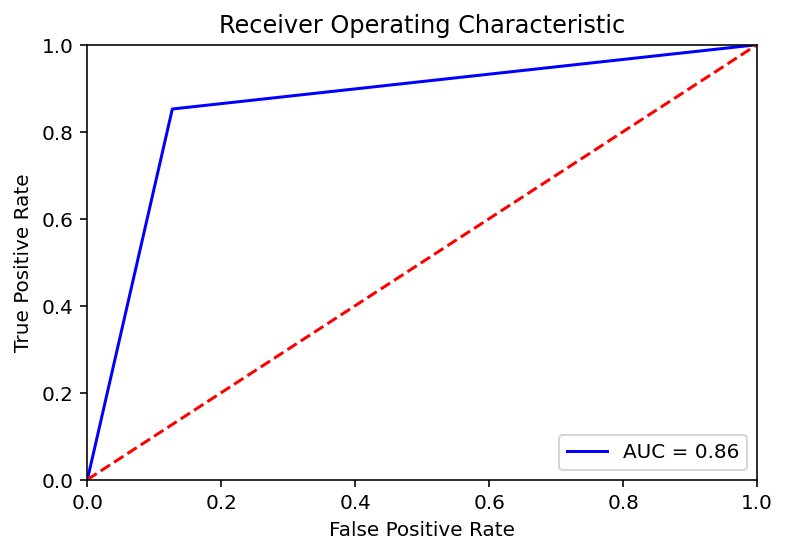

In [ ]:
plot_auc_roc(model)